In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

(1797, 64) (1797,)


In [3]:
np.bincount(y)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

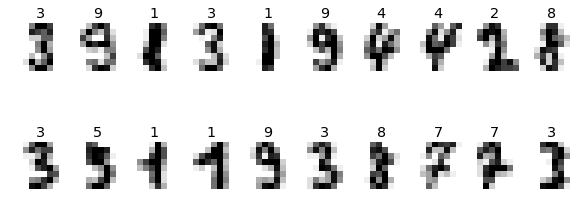

In [4]:
fig, axes = plt.subplots(2, 10, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_train[i].reshape(8, 8), interpolation='nearest', cmap=plt.cm.binary)
    ax.axis('off')
    ax.set_title(y_train[i])
plt.savefig('fig.png', dpi=150)

In [5]:
def plot_confusion_matrix(confmat, target_names=None, title=None):
    plt.matshow(confmat, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            plt.text(x=j, y=i, s=f'{confmat[i][j]}', va='center', ha='center')

    if target_names is not None:
        plt.xticks(np.arange(len(target_names)), target_names)
        plt.yticks(np.arange(len(target_names)), target_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.grid('off')
    plt.tight_layout()
    plt.savefig('fig.png', dpi=220, transparent=False, bbox_inches='tight')
    
def search_base_model_confmat(X, y, target_names=None):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.metrics import precision_score, recall_score, f1_score
    from sklearn.metrics import confusion_matrix
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
    
    dict_models = {
        'lr': LogisticRegression(),
        'svc': SVC(),
        'knn': KNeighborsClassifier(),
        'tree': DecisionTreeClassifier(),
        'rf': RandomForestClassifier(),
        'gbc': GradientBoostingClassifier(),
    }
    score_precision = []
    score_recall = []
    score_f1 = []
    
    for name, model in dict_models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        average = 'micro'
        score_precision.append(precision_score(y_test, y_pred, average=average))
        score_recall.append(recall_score(y_test, y_pred, average=average))
        score_f1.append(f1_score(y_test, y_pred, average=average))
        
        confmat = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(confmat, target_names=target_names, title=name)

    df = pd.DataFrame({
        'Model': list(dict_models.keys()),
        'Precision': score_precision,
        'Recall': score_recall,
        'F-score': score_f1,
    })
    return df

,Model,Precision,Recall,F-score
0,lr,0.951111,0.951111,0.951111
1,svc,0.577778,0.577778,0.577778
2,knn,0.988889,0.988889,0.988889
3,tree,0.851111,0.851111,0.851111
4,rf,0.946667,0.946667,0.946667
5,gbc,0.953333,0.953333,0.953333


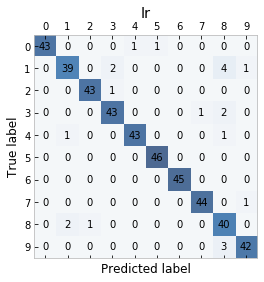

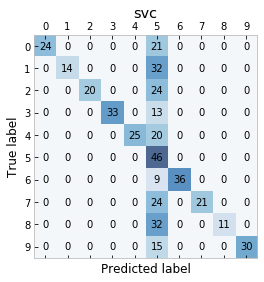

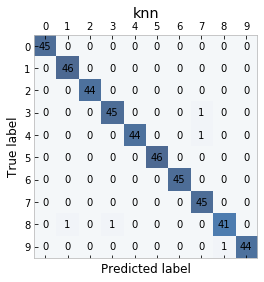

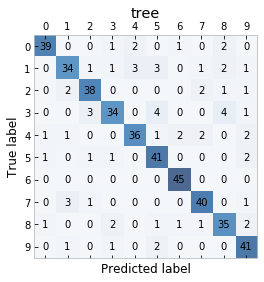

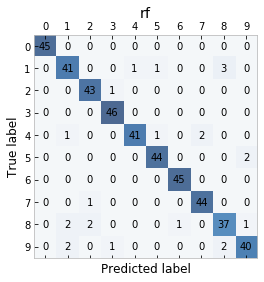

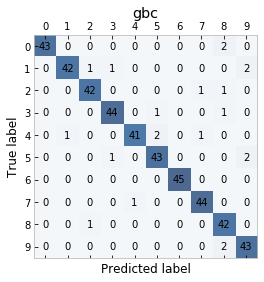

In [6]:
search_base_model_confmat(X, y, target_names=list('0123456789'))

In [7]:
def get_best_model_and_accuracy(model, params, X, y):
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(model, params, error_score=0, cv=5, n_jobs=-1)
    grid.fit(X, y)
    print(f"Best accuracy: {grid.best_score_:.3f}")
    print(f"Best parameters: {grid.best_params_}")
    print(f"Avg. time to fit: {grid.cv_results_['mean_fit_time'].mean():.3f}")
    print(f"Avg. time to predict: {grid.cv_results_['mean_score_time'].mean():.3f}")

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

clf = SVC()
model = Pipeline([
    ('clf', clf),
])
params = {
    'clf__kernel': ['rbf', 'poly', 'linear'],
    'clf__C': [0.01, 0.1, 1],
    'clf__degree': [2, 3, 4],
    'clf__gamma': [1e-4, 1e-3, 1e-2],
}

get_best_model_and_accuracy(model, params, X, y)

Best accuracy: 0.972
Best parameters: {'clf__C': 1, 'clf__degree': 2, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
Avg. time to fit: 0.166
Avg. time to predict: 0.028


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train accuracy = 0.998
Test accuracy = 0.989


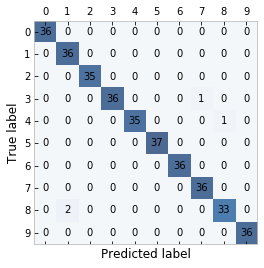

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = SVC(kernel='rbf', C=1, degree=2, gamma=0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Train accuracy = {accuracy_score(clf.predict(X_train), y_train):.3f}")
print(f"Test accuracy = {accuracy_score(y_test, y_pred):.3f}")
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat, target_names=list('0123456789'))
plt.savefig('fig.png', dpi=150)

Train accuracy = 1.000
Test accuracy = 0.992


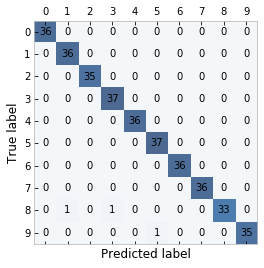

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = SVC(kernel='poly', C=0.1, degree=3, gamma=0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Train accuracy = {accuracy_score(clf.predict(X_train), y_train):.3f}")
print(f"Test accuracy = {accuracy_score(y_test, y_pred):.3f}")
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat, target_names=list('0123456789'))
plt.savefig('fig.png', dpi=150)